**Covariance and Correlation**

Covariance measures how two variables vary in tandem from the their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation betwee page speed (how fast each web page reloads) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be though of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

First, let's just make page speed and purchase amount totally random and independent of each other; a verysmall covariance will result as there is no real correlation:

-0.3787378883085366

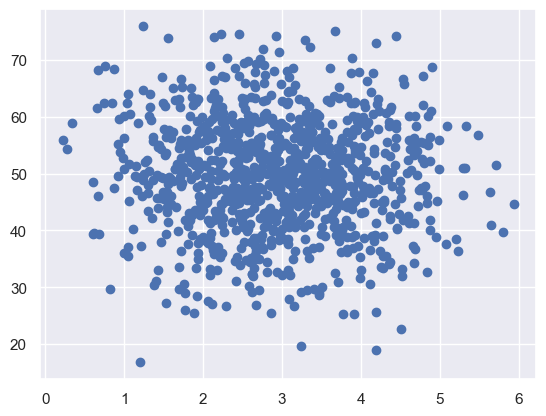

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def de_mean(x):
    xmean = np.mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n-1)

pagespeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

plt.scatter(pagespeeds, purchaseAmount)
covariance(pagespeeds, purchaseAmount)

Now we'll make our fabricated purchase amounts as an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; Pages that render in less time result in more money spent.

-9.44550896964996

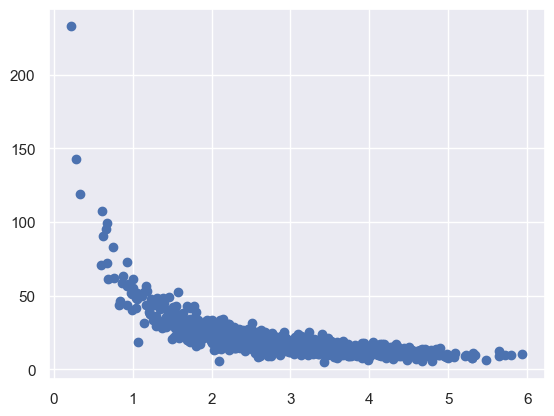

In [6]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pagespeeds
plt.scatter(pagespeeds, purchaseAmount)
covariance(pagespeeds, purchaseAmount)

Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. correlation normalizes everything by their standard deviations, giving you an easier to understand value that rangesf rom -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

In [7]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) /stddevx / stddevy
correlation(pagespeeds, purchaseAmount)

-0.6780990646572972

numpy can do all this with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in.

In [8]:
np.corrcoef(pagespeeds, purchaseAmount)

array([[ 1.        , -0.67742097],
       [-0.67742097,  1.        ]])

-1.001001001001001

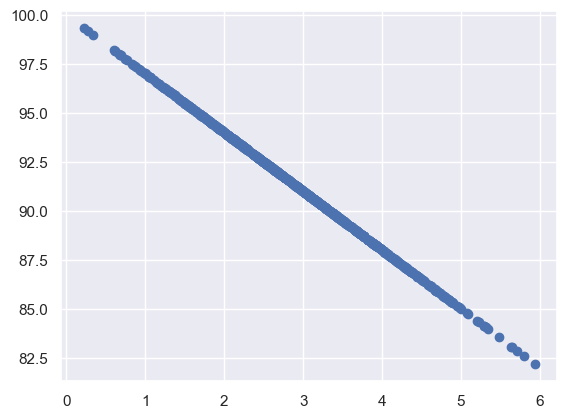

In [9]:
purchaseAmount = 100 - pagespeeds * 3
plt.scatter(pagespeeds, purchaseAmount)
correlation(pagespeeds, purchaseAmount)

**Activity**
Numpy also has a numpy.cov function that can compute covariance for you. Try using it for pagespeeds and purchaseamounts data above. interpret its results, and compare it to the results from our own covariance function above.

In [11]:
Covariance =np.cov(pagespeeds, purchaseAmount)
print(Covariance)

[[ 1.01012881 -3.03038642]
 [-3.03038642  9.09115927]]
